In [3]:
from typing import Dict,TypedDict
from langgraph.graph import StateGraph,START,END

In [4]:
class AgentState(TypedDict):
    num1: int
    operator: str   
    num2: int
    result: int


In [6]:
def addition(state:AgentState)->AgentState:
    if state['operator'] == '+':
        state['result'] = state['num1'] + state['num2']
    return state


def subtraction(state:AgentState)->AgentState:
    if state['operator'] == '-':
        state['result'] = state['num1'] - state['num2']
    return state


def router_node(state:AgentState)->AgentState:
    if(state['operator'] == '+'):
        return  "addition_operation"
    elif(state['operator'] == '-'):
        return "subtraction_operation"
    

In [7]:
graph=StateGraph(AgentState)
graph.add_node("add_node", addition)
graph.add_node("sub_node", subtraction)
graph.add_node("router_node", lambda state: state)

graph.add_edge(START, "router_node")


graph.add_conditional_edges(
    "router_node",
    router_node,
    {
        "addition_operation": "add_node",
        "subtraction_operation": "sub_node"
    }
                            )
graph.add_edge("add_node", END)
graph.add_edge("sub_node", END)
app=graph.compile()

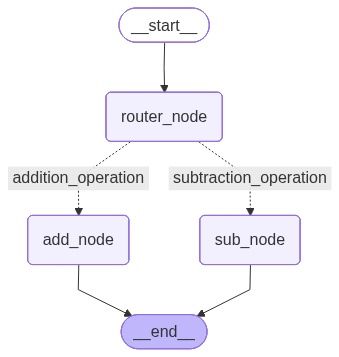

In [8]:
from IPython.display import    Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
ans=app.invoke({
    "num1": 5,
    "operator": "-",
    "num2": 3
})
print(ans["result"])

2
